### Unsupervised Learning on Country Data

#### Importing lib's

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

#### Accessing Data

In [59]:
vars_total = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']

In [60]:
country = pd.read_csv("./data/Country-data.csv")

#### 1) How many countries are? - 167

In [61]:
country['country'].nunique()

167

#### Set new index

In [62]:
country = country.set_index('country')

In [63]:
country_copy = country.copy()

#### Looking for NaN or Null values

In [64]:
country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


#### 2) Graphics and Analysis

##### Value count, mean, std and quartis

In [65]:
tab_1 = country.describe()

In [66]:
tab_1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


##### Pair plot whit all variables

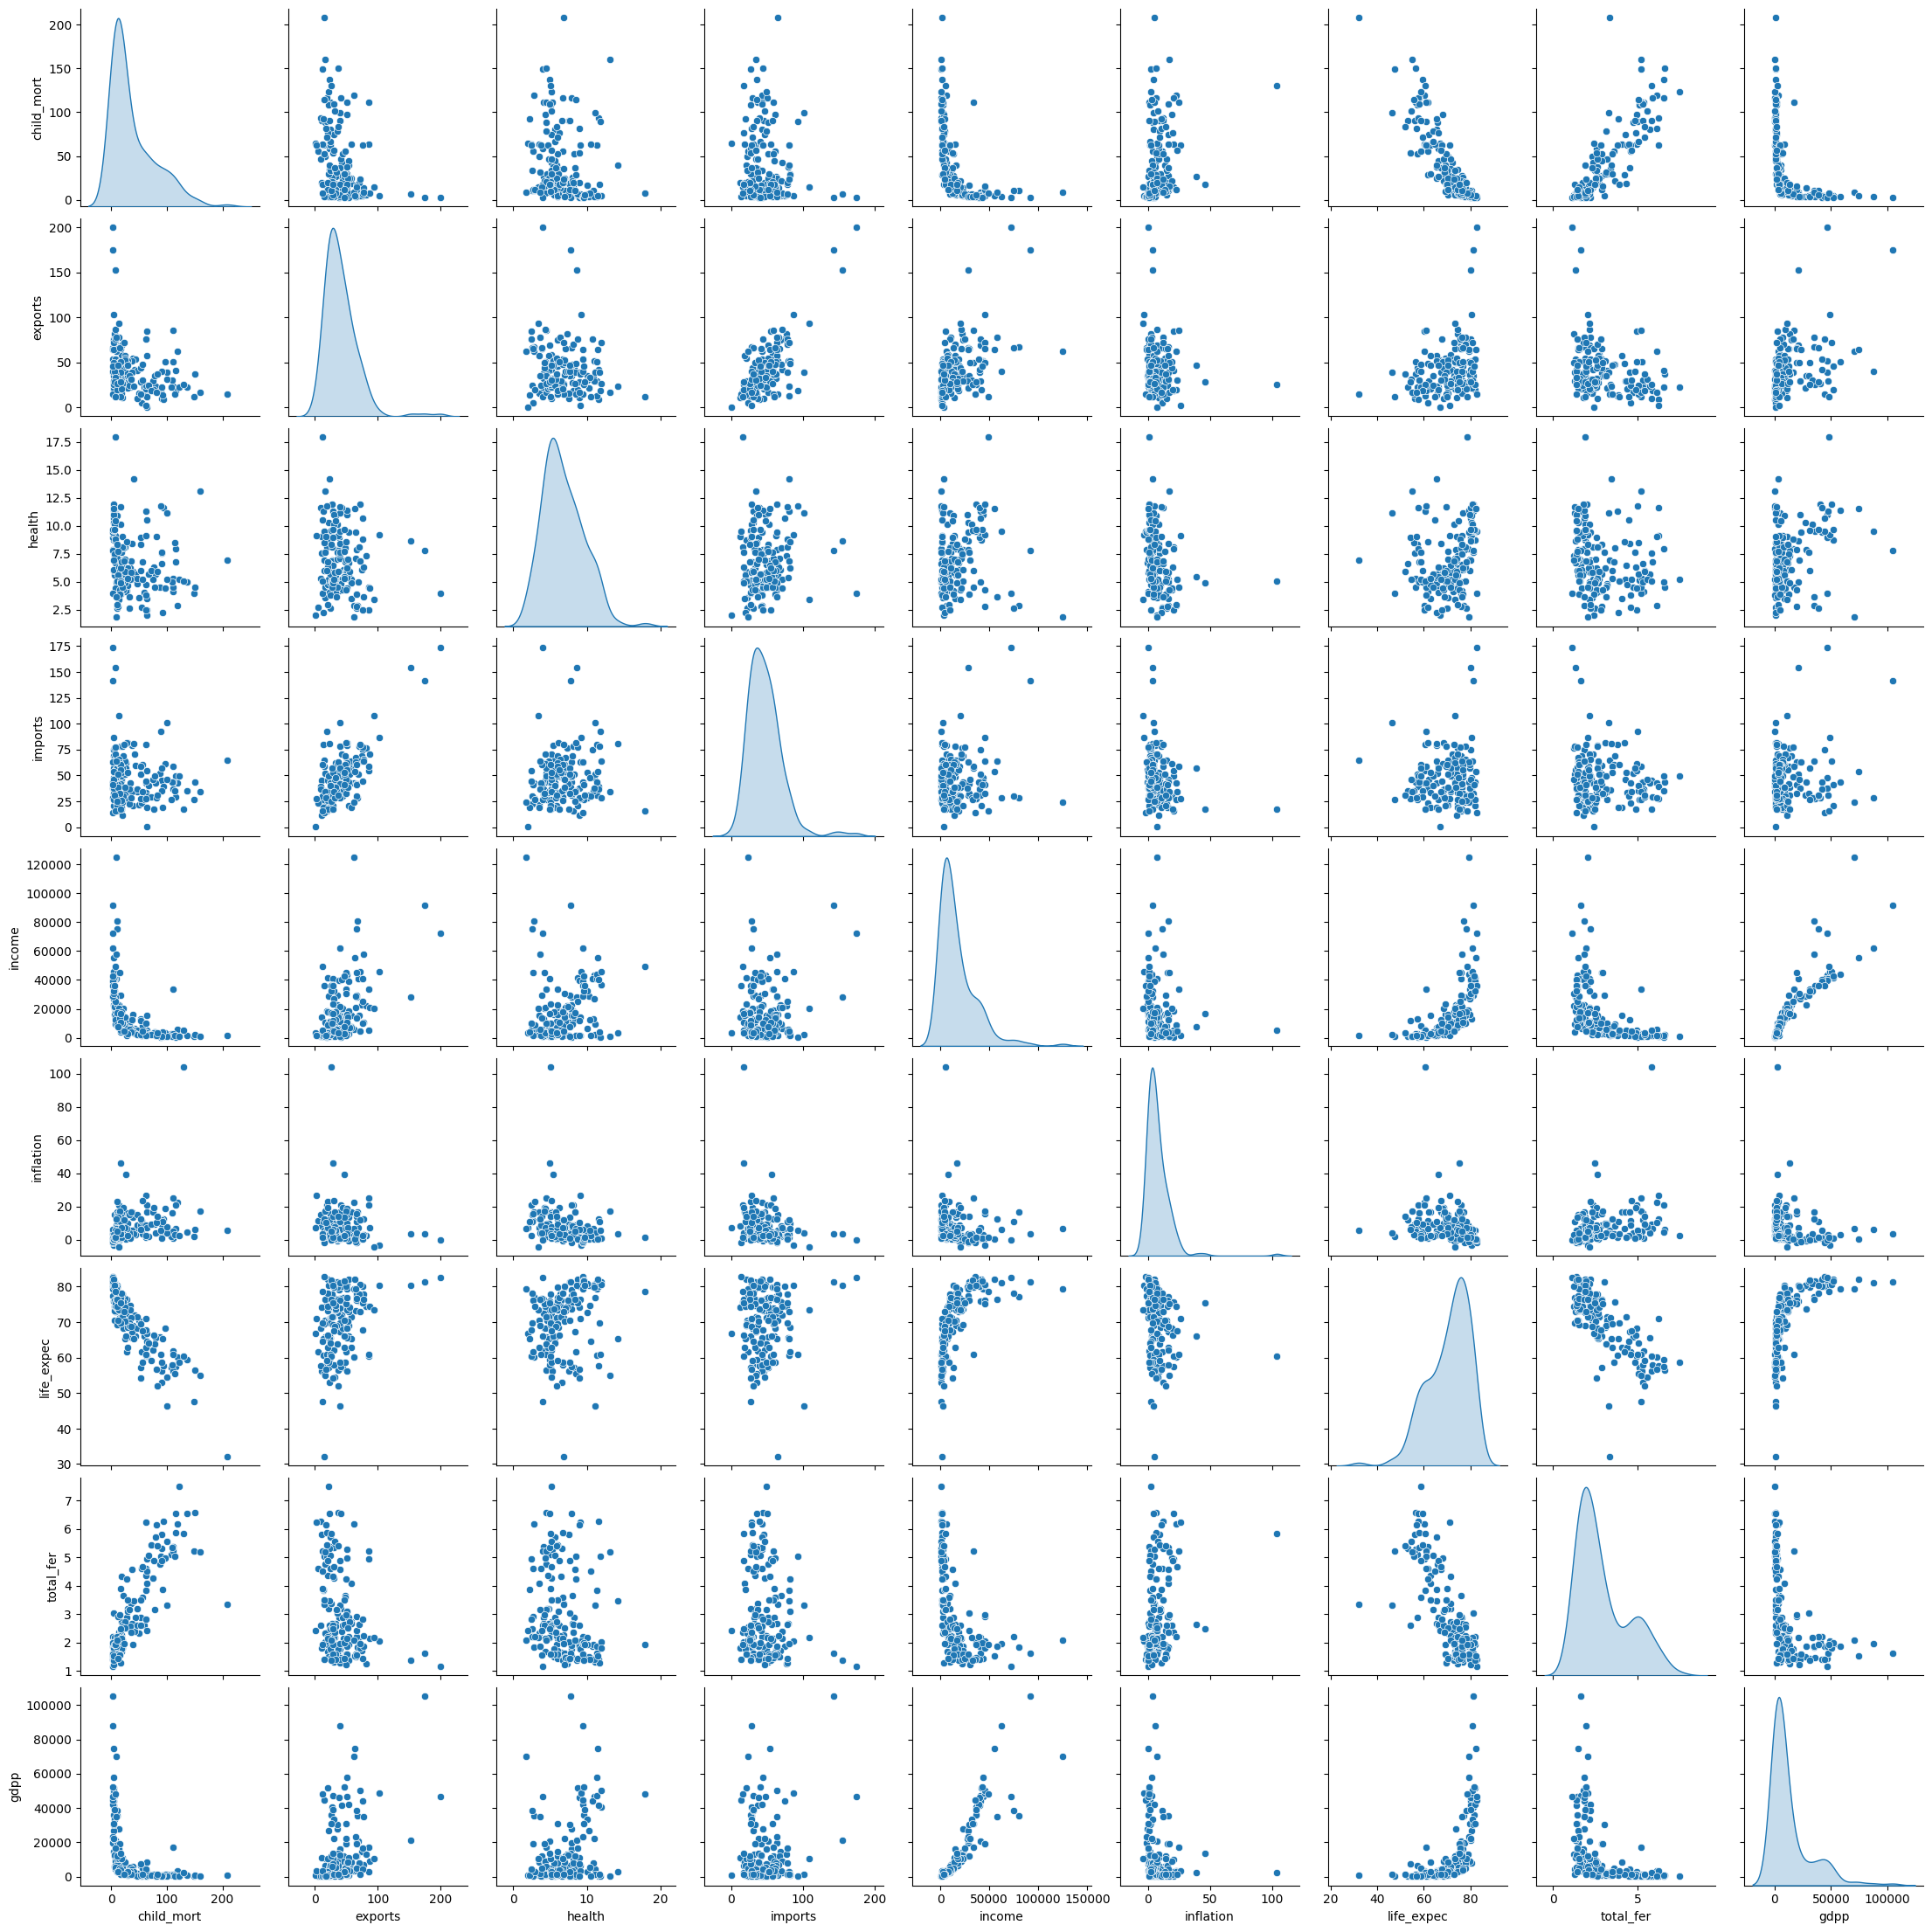

In [67]:
sns.pairplot(country, diag_kind="kde")
plt.show()

##### According to the graph, and with table 1 (tab_1) it's possible to see that the values presented by the variables chance a lot. The minimum and maximum values are different for some variables. The variables 'income' and 'gdpp' are the two that have the highest maximum values compared to other variables. At this point, the correct thing to do is transform the values so that they are in the same range.

### Log func to all data_set

In [68]:
country_log = country.copy()
country_log = np.log(country)

In [69]:
country_log

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,4.502029,2.302585,2.025513,3.804438,7.383989,2.244956,4.028917,1.761300,6.315358
Albania,2.809403,3.332205,1.879465,3.883624,9.203316,1.501853,4.334673,0.500775,8.316300
Algeria,3.306887,3.648057,1.427916,3.446808,9.464983,2.778819,4.337291,1.061257,8.402904
Angola,4.779123,4.131961,1.047319,3.758872,8.682708,3.109061,4.096010,1.818077,8.169053
Antigua and Barbuda,2.332144,3.817712,1.796747,4.075841,9.857444,0.364643,4.341205,0.756122,9.409191
...,...,...,...,...,...,...,...,...,...
Vanuatu,3.374169,3.841601,1.658228,3.964615,7.989560,0.963174,4.143135,1.252763,7.996317
Venezuela,2.839078,3.349904,1.591274,2.867899,9.711116,3.826465,4.322807,0.904218,9.510445
Vietnam,3.148453,4.276666,1.922788,4.384524,8.409608,2.493205,4.291828,0.667829,7.177782


In [70]:
country_log.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,159.000000,167.000000,167.000000,167.000000
mean,3.047884,3.504018,1.835011,3.704301,9.115402,1.535960,4.247485,0.961887,8.499637
std,1.160054,0.769174,0.423748,0.686137,1.228979,1.170904,0.138750,0.480728,1.500006
min,0.955511,-2.216407,0.593327,-2.719617,6.411818,-1.832581,3.468856,0.139762,5.442418
25%,2.109312,3.169686,1.593306,3.407820,8.118197,0.725057,4.178992,0.585001,7.192821
50%,2.960105,3.555348,1.843719,3.768153,9.206332,1.699279,4.291828,0.879627,8.446771
75%,4.128745,3.938664,2.151745,4.073288,10.034506,2.411429,4.341205,1.355805,9.549611
max,5.337538,5.298317,2.884801,5.159055,11.736069,4.644391,4.416428,2.013569,11.561716


##### Correlation map

Text(0.5, 1.0, 'Correlation with Logging')

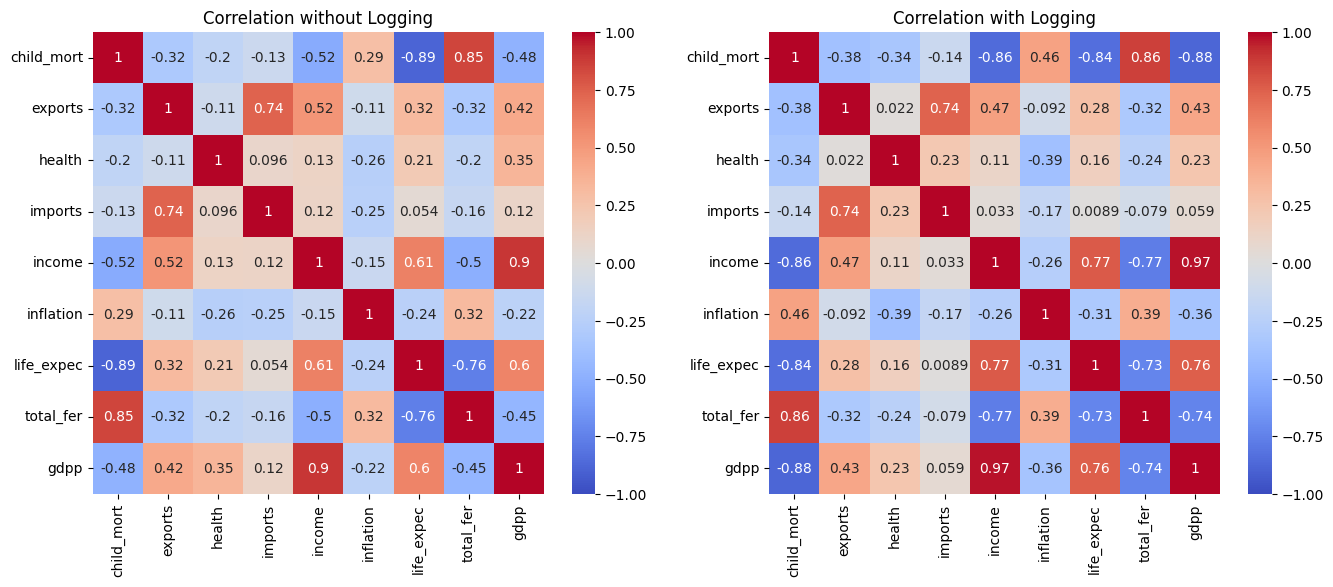

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
ax = plt.subplot(121)
sns.heatmap(country.corr(), cmap='coolwarm', vmax=1, vmin=-1, annot=True)
ax.set_title("Correlation without Logging")
ax = plt.subplot(122)
sns.heatmap(country_log.corr(), cmap='coolwarm', vmax=1, vmin=-1, annot=True)
ax.set_title("Correlation with Logging")

##### According to the heatmap, "income" and "gdpp" are the most correlatade variables in this data set

##### When we made the "log func" for "income" and "gdpp" the correlation between the two increases in relation to the previous heatmap. Before was 0.9, now 0.97

In [72]:
country_log.income.sort_values()

country
Congo, Dem. Rep.             6.411818
Liberia                      6.551080
Burundi                      6.638568
Niger                        6.701960
Central African Republic     6.788972
                              ...    
Singapore                   11.185809
Kuwait                      11.227907
Brunei                      11.297254
Luxembourg                  11.426278
Qatar                       11.736069
Name: income, Length: 167, dtype: float64

In [73]:
country.income.sort_values()

country
Congo, Dem. Rep.               609
Liberia                        700
Burundi                        764
Niger                          814
Central African Republic       888
                             ...  
Singapore                    72100
Kuwait                       75200
Brunei                       80600
Luxembourg                   91700
Qatar                       125000
Name: income, Length: 167, dtype: int64

___________________
#### *Above we can see the difference between the values before and after the log func to the income variable*
___________________

#### Let's use *kmeans* at the "income" and "gdpp" variables whithou logging, and then with logging

In [74]:
X1 = 'income'
X2 = 'gdpp'
vars = ['income', 'gdpp']

#### Distribution of variables

Text(0.5, 1.0, 'Distribution with Logging')

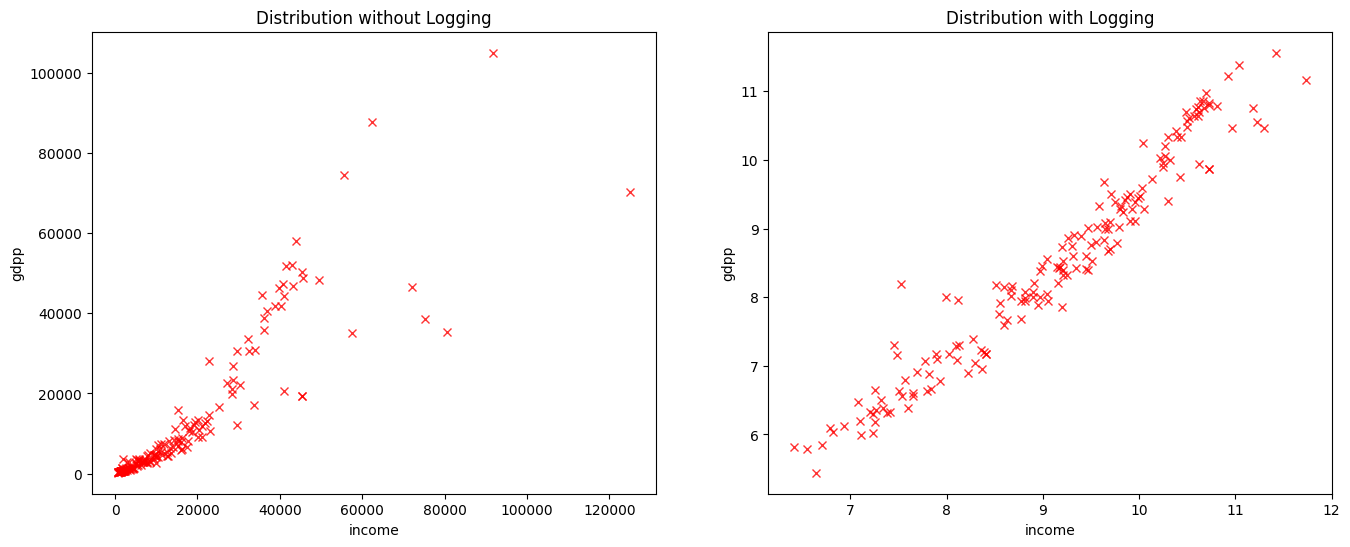

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
ax = plt.subplot(121)
plt.plot(country[X1], country[X2], 'x', c='r', alpha=0.8)
plt.xlabel(X1)
plt.ylabel(X2)
ax.set_title("Distribution without Logging")
ax = plt.subplot(122)
plt.plot(country_log[X1], country_log[X2], 'x', c='r', alpha=0.8)
plt.xlabel(X1)
plt.ylabel(X2)
ax.set_title("Distribution with Logging")

#### Without Scalling

In [76]:
model_raw = KMeans(n_clusters=3,
                    n_init=100,
                    max_iter=1000,
                    random_state=42)

In [77]:
model_raw.fit(country[vars])

KMeans(max_iter=1000, n_clusters=3, n_init=100, random_state=42)

In [78]:
country['clusters'] = model_raw.predict(country[vars])

In [79]:
len(country[country['clusters'] == 0])

128

In [80]:
len(country[country['clusters'] == 1])

7

In [81]:
len(country[country['clusters'] == 2])

32

#### Logging

In [82]:
model_log = KMeans(n_clusters=3,
                    n_init=100,
                    max_iter=1000,
                    random_state=42)

In [83]:
model_log.fit(country_log[vars])

KMeans(max_iter=1000, n_clusters=3, n_init=100, random_state=42)

In [84]:
country_log['clusters_log'] = model_log.predict(country_log[vars])

In [85]:
len(country_log[country_log['clusters_log'] == 0])

51

In [86]:
len(country_log[country_log['clusters_log'] == 1])

74

In [87]:
len(country_log[country_log['clusters_log'] == 2])

42

Text(0.5, 1.0, 'Distribution with Logging')

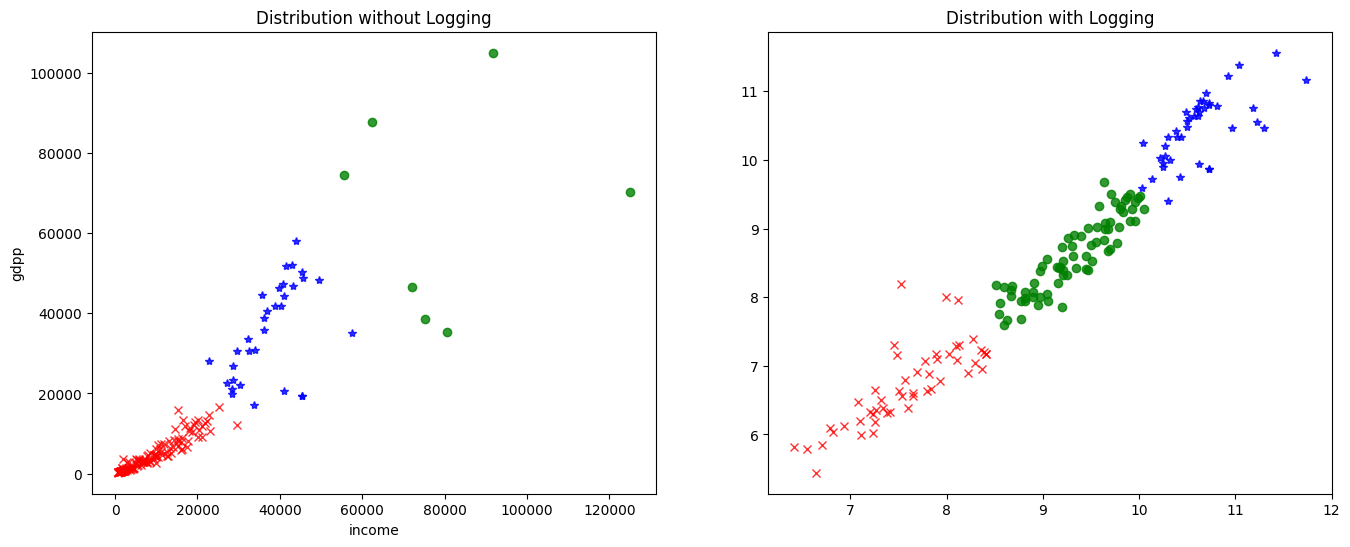

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
ax = plt.subplot(121)
plt.plot(country[country['clusters']==0][X1], country[country['clusters']==0][X2], 'x', c='r', alpha=0.8)
plt.plot(country[country['clusters']==1][X1], country[country['clusters']==1][X2], 'o', c='g', alpha=0.8)
plt.plot(country[country['clusters']==2][X1], country[country['clusters']==2][X2], '*', c='b', alpha=0.8)
plt.xlabel(X1)
plt.ylabel(X2)
ax.set_title("Distribution without Logging")
ax = plt.subplot(122)
plt.plot(country_log[country_log['clusters_log']==0][X1], country_log[country_log['clusters_log']==0][X2], 'x', c='r', alpha=0.8)
plt.plot(country_log[country_log['clusters_log']==1][X1], country_log[country_log['clusters_log']==1][X2], 'o', c='g', alpha=0.8)
plt.plot(country_log[country_log['clusters_log']==2][X1], country_log[country_log['clusters_log']==2][X2], '*', c='b', alpha=0.8)
ax.set_title("Distribution with Logging")

#### Now we going to use the StandarScaler

In [89]:
country_copy = country[vars_total]
country_copy['income'] = np.log(country_copy['income'] )
country_copy['gdpp'] = np.log(country_copy['gdpp'] )
country_copy = np.log(country_copy)

In [90]:
scaler = StandardScaler()
country_scaled = pd.DataFrame(scaler.fit_transform(country_copy), columns=country_copy.columns, index=country_copy.index)

In [91]:
model_scaled = KMeans(n_clusters=3,
                    n_init=100,
                    max_iter=1000,
                    random_state=42)

In [92]:
country_scaled.dropna(inplace=True)

In [93]:
model_scaled.fit(country_scaled)

KMeans(max_iter=1000, n_clusters=3, n_init=100, random_state=42)

In [94]:
country_scaled['clusters_scaled'] = model_scaled.predict(country_scaled)

Text(0.5, 1.0, 'Distribution with StandardScaler')

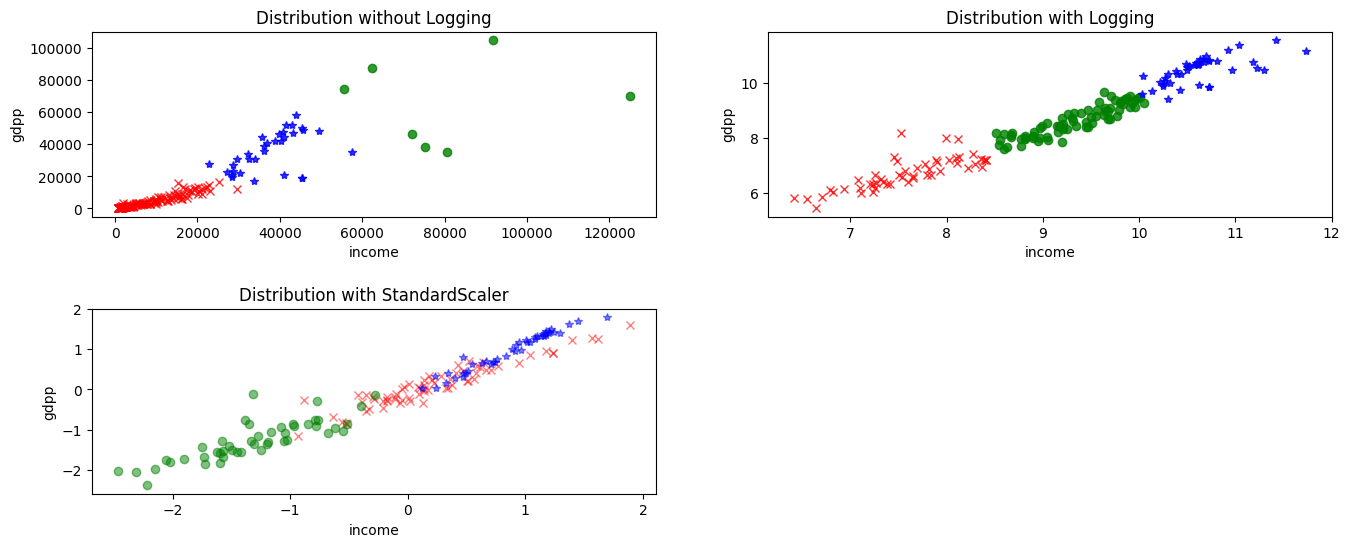

In [95]:
fig, axs = plt.subplots(1, 3, figsize=(16,6))
plt.subplots_adjust(hspace=0.5)
ax = plt.subplot(221)
plt.plot(country[country['clusters']==0][X1], country[country['clusters']==0][X2], 'x', c='r', alpha=0.8)
plt.plot(country[country['clusters']==1][X1], country[country['clusters']==1][X2], 'o', c='g', alpha=0.8)
plt.plot(country[country['clusters']==2][X1], country[country['clusters']==2][X2], '*', c='b', alpha=0.8)
plt.xlabel(X1)
plt.ylabel(X2)
ax.set_title("Distribution without Logging")
ax = plt.subplot(222)
plt.plot(country_log[country_log['clusters_log']==0][X1], country_log[country_log['clusters_log']==0][X2], 'x', c='r', alpha=0.8)
plt.plot(country_log[country_log['clusters_log']==1][X1], country_log[country_log['clusters_log']==1][X2], 'o', c='g', alpha=0.8)
plt.plot(country_log[country_log['clusters_log']==2][X1], country_log[country_log['clusters_log']==2][X2], '*', c='b', alpha=0.8)
plt.xlabel(X1)
plt.ylabel(X2)
ax.set_title("Distribution with Logging")
ax = plt.subplot(223)
plt.plot(country_scaled[country_scaled['clusters_scaled']==0][X1], country_scaled[country_scaled['clusters_scaled']==0][X2], 'x', c='r', alpha=0.5)
plt.plot(country_scaled[country_scaled['clusters_scaled']==1][X1], country_scaled[country_scaled['clusters_scaled']==1][X2], 'o', c='g', alpha=0.5)
plt.plot(country_scaled[country_scaled['clusters_scaled']==2][X1], country_scaled[country_scaled['clusters_scaled']==2][X2], '*', c='b', alpha=0.5)
plt.xlabel(X1)
plt.ylabel(X2)
ax.set_title("Distribution with StandardScaler")

#### Nos 3 gráficos acima podemos notar que dependendo de como as variáveis são usadas no modelos, podemos ter resultados diferente. No primeiro deles, usando variáveis sem uma função LOG, temos alguns *outlayers* fazendo diferença na hora da clusterização, deixando dos grupos com uma desproporcionalidade grande (em quantidade). No segundo gráfico, com o uso de um função LOG nas variáveis, temos uma distribuição mais proporcional na quantidade de pontos dentro de cada cluster. A função LOG faz com que o efeito *outlayers* seja minimizado. No ultimo gráfico, utilizando uma função de escalonamento (StandartScaler diretamente nas variáveis originais) podemos notar que houve uma sobreposição de cluster, enquanto os *outlayers* continuaram fazendo diferença na hora da separação.

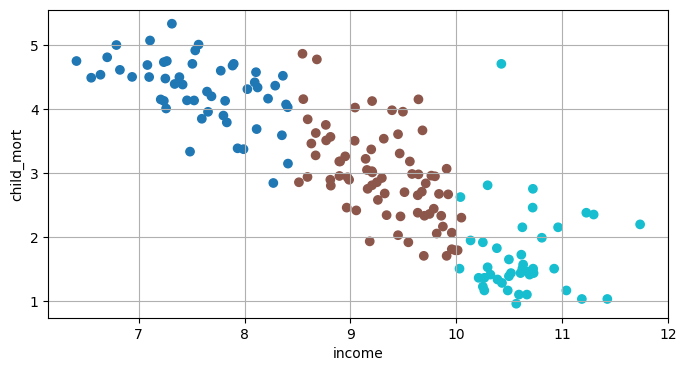

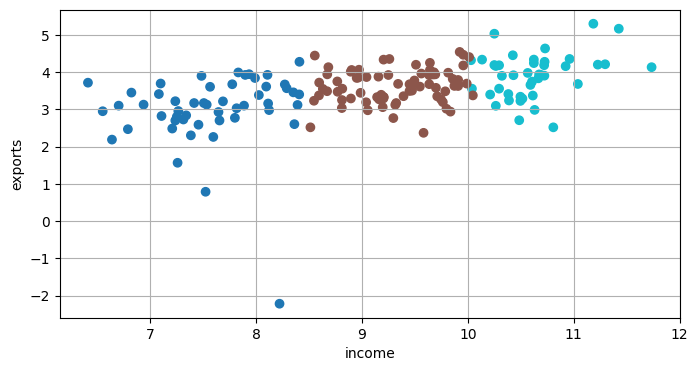

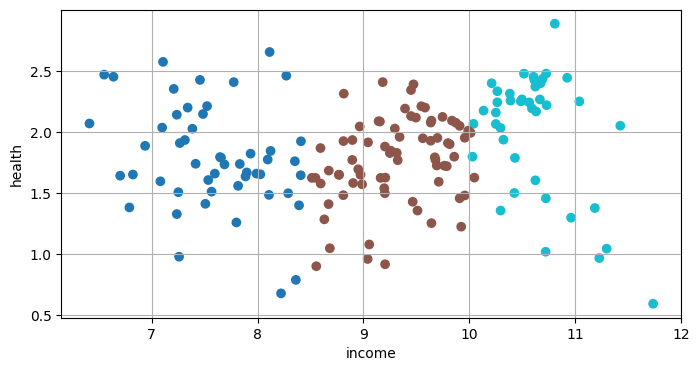

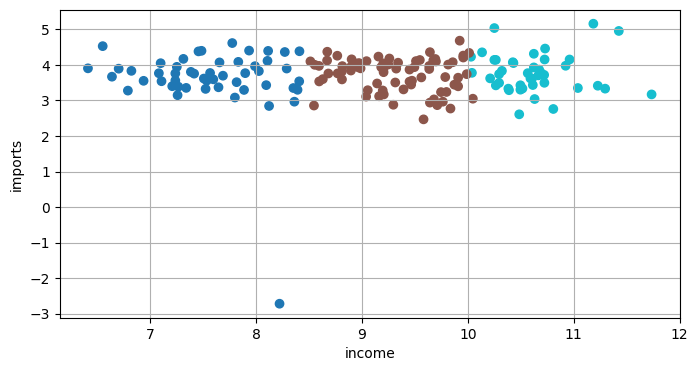

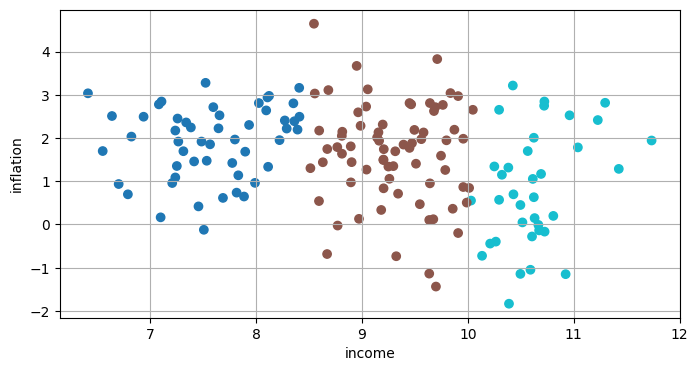

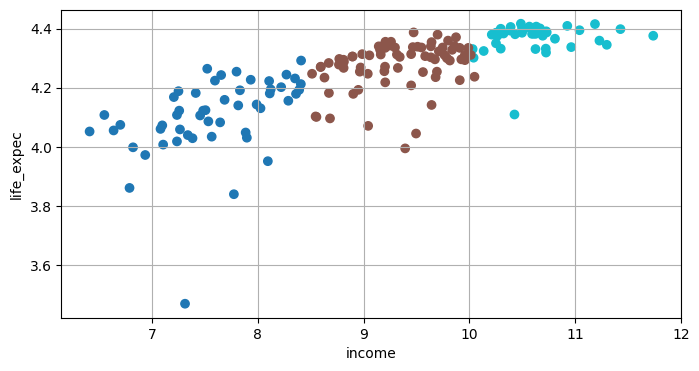

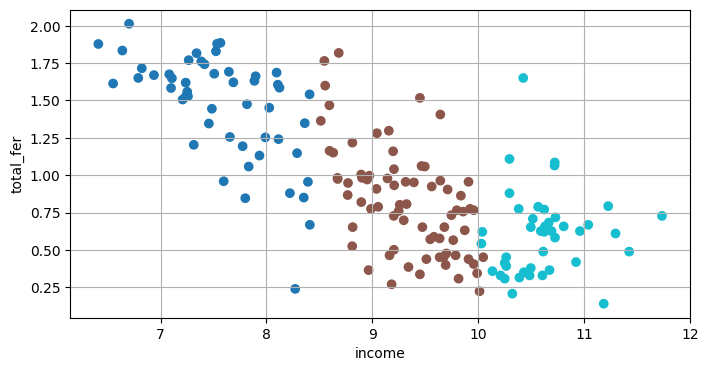

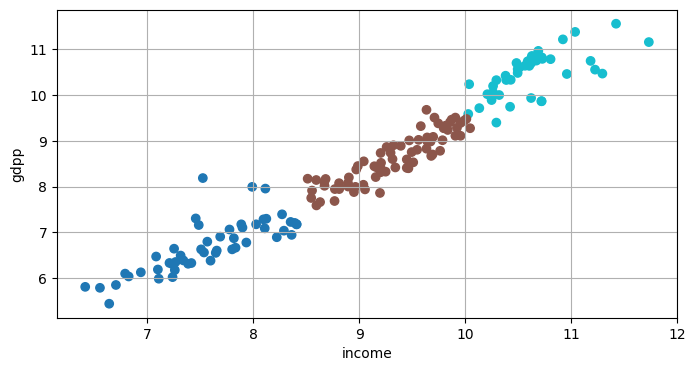

In [96]:
for feature in country_log.columns:
    if feature == 'income' or feature == 'clusters_log' or feature == 'labels':
        continue
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.scatter(country_log["income"],
    country_log[feature],
    c=country_log['clusters_log'], cmap='tab10')
    ax.set_xlabel("income")
    ax.set_ylabel(feature)
    ax.grid(True)
       



#### Nos gráficos acima, podemos ver a clusterização entre *income* e todas as outras váriaveis da base apenas com uma função LOG. É possível notas que existe uma distrubição padrão e bem distribuida entre as classes.

___________________
#### Distribuição das variáveis na base original, por cluster, sem função LOG ou StandardScaler

In [97]:
country[country['clusters']==0][vars_total].describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,47.389844,35.865617,6.332031,45.921609,8569.242188,8.957648,67.873437,3.263359,4438.390625
std,40.972276,19.240987,2.348954,19.737419,6833.699409,11.361343,8.259192,1.555788,4100.482425
min,4.500000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.250000,231.000000
25%,16.575000,22.500000,4.855000,30.675000,2470.000000,2.617500,61.775000,2.055000,1030.000000
50%,30.750000,31.950000,5.885000,44.000000,6720.000000,6.370000,69.800000,2.665000,3075.000000
75%,68.075000,47.925000,7.667500,58.675000,13350.000000,12.100000,74.500000,4.602500,6567.500000
max,208.000000,93.800000,14.200000,108.000000,29600.000000,104.000000,80.400000,7.490000,16600.000000


In [98]:
country[country['clusters']==1][vars_total].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,6.228571,96.442857,5.712857,68.571429,80342.857143,6.388714,80.285714,1.767143,65442.857143
std,3.707971,63.326478,3.829194,62.521269,22950.733986,5.999308,2.087605,0.362248,26336.340998
min,2.800000,39.700000,1.810000,23.800000,55500.000000,-0.046000,77.100000,1.150000,35300.000000
25%,3.000000,63.150000,2.735000,28.250000,67200.000000,1.968500,78.850000,1.575000,42550.000000
50%,4.500000,66.700000,3.960000,30.400000,75200.000000,5.950000,81.000000,1.840000,70300.000000
75%,9.750000,121.200000,8.625000,97.650000,86150.000000,9.090000,81.750000,2.010000,81200.000000
max,10.800000,200.000000,11.500000,174.000000,125000.000000,16.700000,82.700000,2.210000,105000.000000


In [99]:
country[country['clusters']==2][vars_total].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000
mean,8.800000,49.978125,8.991563,46.021875,37621.875000,3.383312,79.15625,1.944687,35587.500000
std,18.906715,29.064708,2.972031,25.984024,7646.619931,6.037584,3.97045,0.752132,12060.245276
min,2.600000,12.400000,2.770000,13.600000,22900.000000,-3.220000,60.90000,1.230000,17100.000000
25%,3.875000,28.875000,7.817500,30.775000,31825.000000,0.570000,79.30000,1.455000,23175.000000
50%,4.250000,47.800000,9.450000,40.950000,37850.000000,1.190000,80.20000,1.865000,35400.000000
75%,6.350000,65.775000,10.775000,57.850000,42975.000000,3.347500,81.32500,2.035000,46375.000000
max,111.000000,153.000000,17.900000,154.000000,57600.000000,24.900000,82.80000,5.210000,58000.000000


___________________
#### Distribuição das variáveis, por cluster, utilizando apenas uma funçaõ LOG

In [100]:
country_log[country_log['clusters_log']==0][vars_total].describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,4.295641,3.003610,1.792855,3.617656,7.584272,1.901542,4.104866,1.457898,6.715001
std,0.513930,0.979300,0.427535,0.997138,0.528765,0.839955,0.134311,0.360147,0.583625
min,2.844909,-2.216407,0.678034,-2.719617,6.411818,-0.122168,3.468856,0.239017,5.442418
25%,4.052418,2.750221,1.576742,3.394486,7.244202,1.344128,4.050043,1.247016,6.323430
50%,4.385770,3.126761,1.738710,3.754199,7.565275,2.033398,4.122284,1.583094,6.645091
75%,4.648626,3.586105,2.051417,4.006458,8.007865,2.501402,4.191925,1.682681,7.170090
max,5.337538,4.276666,2.653242,4.615121,8.409608,3.277145,4.291828,2.013569,8.188689


In [101]:
country_log[country_log['clusters_log']==0].index

Index(['Afghanistan', 'Bangladesh', 'Benin', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Cote d'Ivoire', 'Eritrea', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Kenya', 'Kiribati',
       'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Moldova', 'Mozambique',
       'Myanmar', 'Nepal', 'Niger', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Solomon Islands', 'Sudan', 'Tajikistan', 'Tanzania',
       'Timor-Leste', 'Togo', 'Uganda', 'Uzbekistan', 'Vanuatu', 'Vietnam',
       'Yemen', 'Zambia'],
      dtype='object', name='country')

In [102]:
country_log[country_log['clusters_log']==1][vars_total].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,74.000000,74.000000,74.000000,74.000000,74.000000,72.000000,74.000000,74.000000,74.000000
mean,2.945102,3.621074,1.766717,3.726123,9.320235,1.628981,4.276436,0.824092,8.618560
std,0.703613,0.450935,0.343760,0.462002,0.439661,1.157332,0.079637,0.356277,0.551501
min,1.704748,2.370244,0.900161,2.468100,8.513185,-1.435485,3.994524,0.223144,7.590852
25%,2.422522,3.325934,1.583597,3.444416,8.966351,0.930519,4.253127,0.534875,8.151860
50%,2.928509,3.628332,1.794253,3.876370,9.319185,1.758636,4.298644,0.795229,8.575247
75%,3.354775,3.938664,2.022513,4.072422,9.689661,2.290686,4.334673,0.982078,9.063609
max,4.867534,4.541165,2.406945,4.682131,10.047588,4.644391,4.387014,1.818077,9.680344


In [103]:
country_log[country_log['clusters_log']==1].index

Index(['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Congo, Rep.', 'Costa Rica',
       'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Fiji', 'Gabon', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Latvia', 'Lebanon', 'Lithuania', 'Macedonia, FYR', 'Malaysia',
       'Maldives', 'Mauritius', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia',
       'Nigeria', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Serbia', 'Seychelles', 'South Africa',
       'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Thailand',
       'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine', 'Uruguay',
       'Vene

In [104]:
country_log[country_log['clusters_log']==2][vars_total].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,42.000000,42.000000,42.000000,42.000000,42.000000,36.000000,42.000000,42.000000,42.000000
mean,1.713843,3.905411,2.006528,3.771065,10.613734,0.832010,4.369656,0.602368,10.457165
std,0.682796,0.602092,0.502923,0.546589,0.372100,1.319814,0.050500,0.280678,0.490157
min,0.955511,2.517696,0.593327,2.610070,10.030120,-1.832581,4.109233,0.139762,9.400961
25%,1.341495,3.447198,1.789247,3.416898,10.337354,-0.143083,4.352526,0.381838,10.031076
50%,1.504077,3.929832,2.204885,3.729243,10.599104,0.664703,4.383276,0.620576,10.522058
75%,1.977383,4.233656,2.327242,4.125120,10.724918,1.823306,4.398146,0.715389,10.763726
max,4.709530,5.298317,2.884801,5.159055,11.736069,3.214868,4.416428,1.650580,11.561716


In [105]:
country_log[country_log['clusters_log']==2].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Equatorial Guinea',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Libya', 'Luxembourg',
       'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Portugal',
       'Qatar', 'Saudi Arabia', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

___________________
#### Distribuição das variáveis, por cluster, depois de utilizar a função StandardScaler

In [106]:
country_scaled[country_scaled['clusters_scaled']==0][vars_total].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.033486,0.206538,-0.446002,-0.038895,0.229564,0.433346,0.153049,-0.141940,0.120663
std,0.518274,0.627273,0.875135,0.671528,0.585192,0.714062,0.579213,0.630908,0.541821
min,-1.161304,-1.478449,-2.939059,-1.807101,-0.932600,-1.901239,-1.828622,-1.508220,-1.163876
25%,-0.254392,-0.229881,-0.896438,-0.551854,-0.174795,-0.031619,-0.088857,-0.566108,-0.246159
50%,-0.043000,0.250480,-0.441096,0.067715,0.137400,0.509460,0.305692,-0.116106,0.046855
75%,0.397008,0.673727,0.176407,0.500304,0.533848,0.970382,0.587509,0.201905,0.458008
max,1.436694,1.252812,1.478371,1.021449,1.888814,1.962366,0.927267,1.436913,1.597492


In [107]:
country_scaled[country_scaled['clusters_scaled']==1][vars_total].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,1.196719,-0.733758,-0.159116,-0.209975,-1.311473,0.353227,-1.140448,1.226569,-1.257291
std,0.343372,1.293007,1.050323,1.494921,0.517218,0.814821,0.951465,0.569917,0.502058
min,0.248912,-7.459472,-2.738558,-9.390595,-2.467404,-1.420583,-5.628619,-0.242064,-2.381307
25%,0.949011,-1.029397,-0.711466,-0.452893,-1.594956,-0.164350,-1.471557,1.014429,-1.561920
50%,1.248614,-0.526721,-0.240457,-0.011621,-1.315778,0.368186,-1.023183,1.371834,-1.287189
75%,1.436694,-0.095779,0.512230,0.287475,-0.970949,0.896521,-0.489594,1.600341,-0.909606
max,1.979683,0.818843,1.936746,1.331451,-0.282604,2.663116,0.120019,2.194266,-0.117938


In [108]:
country_scaled[country_scaled['clusters_scaled']==2][vars_total].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,-1.113472,0.315162,0.823784,0.173218,0.870129,-1.047027,0.841381,-0.903902,0.965027
std,0.427875,0.658861,0.565733,0.666800,0.368447,0.798651,0.274515,0.415990,0.477715
min,-1.809110,-1.286169,-0.158261,-1.380381,0.120250,-2.885962,0.140325,-1.574991,0.036841
25%,-1.415296,-0.140620,0.402742,-0.329932,0.541601,-1.501994,0.637376,-1.249744,0.640814
50%,-1.185552,0.232885,0.865140,0.212989,0.934311,-0.966488,0.968068,-0.987523,1.049891
75%,-0.907802,0.578592,1.277850,0.586981,1.160879,-0.478607,1.055693,-0.635041,1.369678
max,-0.058159,2.165653,2.484844,1.948093,1.696045,0.296907,1.168699,0.306030,1.793153


______________
### Encontrando o centroide dos cluster

#### Base Original

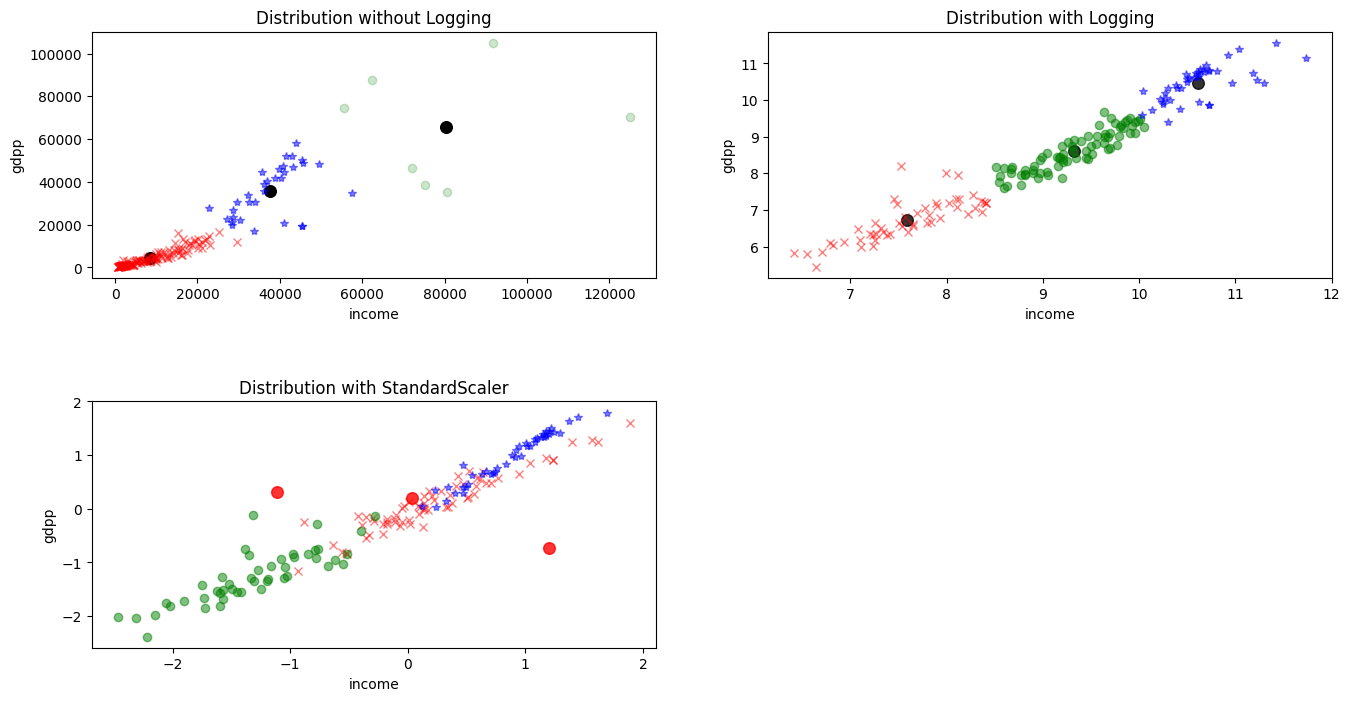

In [109]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))
plt.subplots_adjust(hspace=0.5)
ax = plt.subplot(221)
plt.plot(country[country['clusters']==0][X1], country[country['clusters']==0][X2], 'x', c='r', alpha=0.5)
plt.plot(country[country['clusters']==1][X1], country[country['clusters']==1][X2], 'o', c='g', alpha=0.2)
plt.plot(country[country['clusters']==2][X1], country[country['clusters']==2][X2], '*', c='b', alpha=0.5)
plt.scatter(model_raw.cluster_centers_[:,0], model_raw.cluster_centers_[:,1], s=70, c= 'black', alpha=1)
plt.xlabel(X1)
plt.ylabel(X2)
ax.set_title("Distribution without Logging")
ax = plt.subplot(222)
plt.plot(country_log[country_log['clusters_log']==0][X1], country_log[country_log['clusters_log']==0][X2], 'x', c='r', alpha=0.5)
plt.plot(country_log[country_log['clusters_log']==1][X1], country_log[country_log['clusters_log']==1][X2], 'o', c='g', alpha=0.5)
plt.plot(country_log[country_log['clusters_log']==2][X1], country_log[country_log['clusters_log']==2][X2], '*', c='b', alpha=0.5)
plt.scatter(model_log.cluster_centers_[:,0], model_log.cluster_centers_[:,1], s=70, c= 'black', alpha=0.8)
plt.xlabel(X1)
plt.ylabel(X2)
ax.set_title("Distribution with Logging")
ax = plt.subplot(223)
plt.plot(country_scaled[country_scaled['clusters_scaled']==0][X1], country_scaled[country_scaled['clusters_scaled']==0][X2], 'x', c='r', alpha=0.5)
plt.plot(country_scaled[country_scaled['clusters_scaled']==1][X1], country_scaled[country_scaled['clusters_scaled']==1][X2], 'o', c='g', alpha=0.5)
plt.plot(country_scaled[country_scaled['clusters_scaled']==2][X1], country_scaled[country_scaled['clusters_scaled']==2][X2], '*', c='b', alpha=0.5)
plt.scatter(model_scaled.cluster_centers_[:,0], model_scaled.cluster_centers_[:,1], s=70, c= 'r', alpha=0.8)
plt.xlabel(X1)
plt.ylabel(X2)
ax.set_title("Distribution with StandardScaler")
plt.show()

In [110]:
centers = model_log.cluster_centers_
centers

array([[ 7.58427201,  6.71500057],
       [ 9.32023534,  8.61856016],
       [10.61373388, 10.45716521]])

In [111]:
cluster_0 = country_log[country_log['clusters_log']==0]
cluster_1 = country_log[country_log['clusters_log']==1]
cluster_2 = country_log[country_log['clusters_log']==2]

In [112]:
cluster_0['dist_2'] = (cluster_0[X1]-centers[0,0])**2 + (cluster_0[X2]-centers[0,1])**2
cluster_1['dist_2'] = (cluster_1[X1]-centers[0,0])**2 + (cluster_1[X2]-centers[0,1])**2
cluster_2['dist_2'] = (cluster_2[X1]-centers[0,0])**2 + (cluster_2[X2]-centers[0,1])**2

In [113]:
index_min_0 = cluster_0['dist_2'][cluster_0['dist_2'] == cluster_0['dist_2'].min()].index
index_min_1 = cluster_1['dist_2'][cluster_1['dist_2'] == cluster_1['dist_2'].min()].index
index_min_2 = cluster_2['dist_2'][cluster_2['dist_2'] == cluster_2['dist_2'].min()].index

In [131]:
index_min_0, index_min_1, index_min_2 

(Index(['Chad'], dtype='object', name='country'),
 Index(['Bolivia'], dtype='object', name='country'),
 Index(['Estonia'], dtype='object', name='country'))

In [129]:
country.loc[index_min_0,:][vars_total]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897


In [125]:
country.loc[index_min_1,:][vars_total]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Bolivia,46.6,41.2,4.84,34.3,5410,8.78,71.6,3.2,1980


In [126]:
country.loc[index_min_2,:][vars_total]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Estonia,4.5,75.1,6.03,68.7,22700,1.74,76.0,1.72,14600
